In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [108]:
df = pd.read_csv('../data/preprocessed_data.csv')

In [109]:
number_of_new_fights = 11

In [110]:
new_fights_df = df.iloc[:number_of_new_fights,:]
df = df.iloc[number_of_new_fights:,:]
new_fights_df.drop(columns=['B_age', 'R_age'], inplace=True)
df.drop(columns=['B_age', 'R_age'], inplace=True)


In [113]:
df.dropna(subset=['Winner'], inplace=True)

In [114]:
new_fights_df.dropna(subset=['Winner'], inplace=True)

In [117]:
new_fights_df_num = new_fights_df.select_dtypes(include=[np.float, np.int])
scaler = StandardScaler()
new_fights_df[list(new_fights_df_num.columns)] = scaler.fit_transform(new_fights_df[list(new_fights_df_num.columns)])

In [118]:
df_num = df.select_dtypes(include=[np.float, np.int])
scaler = StandardScaler()
df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

In [119]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
11,Red,False,-0.209929,-0.562346,-0.461835,-0.290325,0.545276,0.194449,0.452442,0.143342,...,-0.040882,0.553792,-0.02359,-0.487569,-0.205225,-0.052807,0.564647,-0.019259,-0.509022,-0.184194
12,Red,False,-0.209929,0.876725,-0.461835,1.825355,-1.103731,0.069740,1.048563,1.682362,...,-0.040882,0.553792,-0.02359,-0.487569,-0.205225,-0.052807,0.564647,-0.019259,-0.509022,-0.184194
13,Red,False,-0.209929,-0.517375,-0.461835,-0.025865,-0.040556,-0.138109,-0.228839,-0.397684,...,-0.040882,0.553792,-0.02359,-0.487569,-0.205225,-0.052807,-1.771018,-0.019259,1.964551,-0.184194
14,Blue,False,-0.209929,-0.517375,-0.461835,-0.025865,-0.040556,-0.138109,-0.228839,-0.397684,...,-0.040882,-1.805731,-0.02359,2.050991,-0.205225,-0.052807,-1.771018,-0.019259,-0.509022,5.429049
15,Blue,False,-0.209929,-0.202578,-0.461835,0.728948,1.272141,-0.408312,-0.372546,-0.433790,...,-0.040882,0.553792,-0.02359,-0.487569,-0.205225,-0.052807,0.564647,-0.019259,-0.509022,-0.184194


In [120]:
new_fights_df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.0,0.094194,-0.444916,1.636418,-1.026840,2.695503,0.939793,-0.285694,...,0.0,0.316228,0.0,-0.316228,0.0,0.0,-1.632993,0.0,2.121320,-0.316228
1,Red,False,0.0,-0.392520,2.041434,-0.369314,0.733849,-0.109231,-1.049006,0.754612,...,0.0,0.316228,0.0,-0.316228,0.0,0.0,0.612372,0.0,-0.471405,-0.316228
2,Red,False,0.0,-0.392520,-0.474399,1.741304,2.848568,-1.212952,2.616621,2.926054,...,0.0,0.316228,0.0,-0.316228,0.0,0.0,0.612372,0.0,-0.471405,-0.316228
3,Red,False,0.0,-0.331710,-0.474399,0.039193,-0.216079,0.184163,-0.211149,-0.263185,...,0.0,0.316228,0.0,-0.316228,0.0,0.0,0.612372,0.0,-0.471405,-0.316228
4,Red,False,0.0,-0.331710,-0.474399,0.039193,-0.216079,0.184163,-0.211149,-0.263185,...,0.0,0.316228,0.0,-0.316228,0.0,0.0,0.612372,0.0,-0.471405,-0.316228


### Handling NaN values

In [6]:
print("number of rows: ,", len(df.index))
print("number of cols: , ", df.shape[1])

number of rows: , 5908
number of cols: ,  177


In [7]:
df.loc[:, df.isna().any()]

,Winner,B_age,R_age
11,Red,NaN,NaN
12,Red,NaN,NaN
13,Red,NaN,NaN
14,Blue,NaN,NaN
15,Blue,NaN,NaN
...,...,...,...
5914,Red,NaN,NaN
5915,Red,NaN,NaN
5916,Red,NaN,NaN
5917,Red,NaN,NaN


In [82]:
df.drop(columns=['B_age', 'R_age'], inplace=True)

In [9]:
df.dropna(subset=['Winner'], inplace=True)

In [10]:
print("number of rows: ,", len(df.index))
print("number of cols: , ", df.shape[1])

number of rows: , 5394
number of cols: ,  175


### Normalizing data

In [12]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [13]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

### Splitting into train, test

In [14]:
y = df['Winner']
X = df.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [15]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [18]:
model.oob_score_

0.7051131928181108

In [19]:
y_preds = model.predict(X_test)

In [20]:
accuracy_score(y_test, y_preds)

0.6481481481481481

In [21]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [22]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('B_SLpM', 0.037656919972279476),
 ('B_TD_Def', 0.023566356359801238),
 ('R_SApM', 0.018505585315306026),
 ('B_Str_Acc', 0.01777345340380842),
 ('R_TD_Acc', 0.014627424817599207),
 ('B_Str_Def', 0.014120338643627058),
 ('B_TD_Avg', 0.013105443019599218),
 ('R_SLpM', 0.01292787163866958),
 ('B_SApM', 0.012772000153461397),
 ('R_Str_Def', 0.01202234589386145),
 ('B_TD_Acc', 0.011379712599944568),
 ('R_TD_Def', 0.011129797532467059),
 ('R_TD_Avg', 0.01106436790971606),
 ('R_Str_Acc', 0.010889688044928195),
 ('R_Sub_Avg', 0.010105406008584361),
 ('R_avg_opp_CTRL_time(seconds)', 0.009752977723343307),
 ('R_avg_opp_SIG_STR_pct', 0.00961044518987786),
 ('R_avg_opp_HEAD_landed', 0.009546640783771671),
 ('B_avg_SIG_STR_att', 0.009402902216949468),
 ('R_avg_opp_DISTANCE_landed', 0.00922579885885051),
 ('B_avg_HEAD_att', 0.008851865589268969),
 ('R_avg_opp_SIG_STR_landed', 0.008671069218907554),
 ('R_avg_opp_HEAD_att', 0.008482220031783803),
 ('R_avg_GROUND_att', 0.008462632696646264),
 ('R_avg_

In [23]:
y_train.value_counts()

Red     3504
Blue    1620
Name: Winner, dtype: int64

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

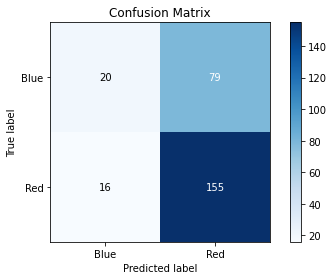

In [24]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [25]:
from imblearn.over_sampling import ADASYN

In [26]:
over_sampler = ADASYN()
X_resampled, y_resampled = over_sampler.fit_sample(X_train, y_train)

In [27]:
pd.Series(y_resampled).value_counts()

Blue    3678
Red     3504
Name: Winner, dtype: int64

In [28]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [29]:
model2.oob_score_

0.8124477861319966

In [30]:
y2_preds = model2.predict(X_test)

In [31]:
accuracy_score(y_test, y2_preds)

0.7111111111111111

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

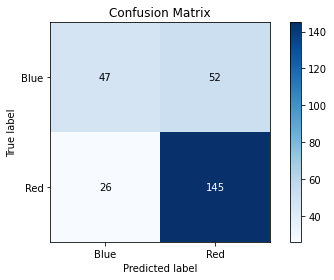

In [32]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [34]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=43),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [36]:
model4 = rf_random.best_estimator_

In [37]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

0.7

In [38]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [39]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=43), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [50, 60, 70], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

In [40]:
rf_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [41]:
model5 = rf_grid.best_estimator_

In [42]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

0.7

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

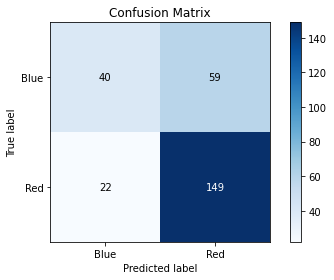

In [43]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        Blue       0.56      0.20      0.30        99
         Red       0.66      0.91      0.77       171

    accuracy                           0.65       270
   macro avg       0.61      0.55      0.53       270
weighted avg       0.62      0.65      0.59       270



In [45]:
print(classification_report(y_test, y2_preds))

              precision    recall  f1-score   support

        Blue       0.64      0.47      0.55        99
         Red       0.74      0.85      0.79       171

    accuracy                           0.71       270
   macro avg       0.69      0.66      0.67       270
weighted avg       0.70      0.71      0.70       270



In [46]:
print(classification_report(y_test, y3_preds))

              precision    recall  f1-score   support

        Blue       0.65      0.40      0.50        99
         Red       0.72      0.87      0.79       171

    accuracy                           0.70       270
   macro avg       0.68      0.64      0.64       270
weighted avg       0.69      0.70      0.68       270



In [47]:
print(classification_report(y_test, y4_preds))

              precision    recall  f1-score   support

        Blue       0.65      0.40      0.50        99
         Red       0.72      0.87      0.79       171

    accuracy                           0.70       270
   macro avg       0.68      0.64      0.64       270
weighted avg       0.69      0.70      0.68       270



### Making Predictions

In [97]:
new_fights_df= new_fights_df.select_dtypes(include=[np.float, np.int])

In [101]:
scaler = StandardScaler()

new_fights_df[list(df_num.columns)] = scaler.fit_transform(new_fights_df[list(df_num.columns)])

<ipython-input-101-f6260914ba3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fights_df[list(df_num.columns)] = scaler.fit_transform(new_fights_df[list(df_num.columns)])
/Users/justinmilner/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [123]:
new_fights_df.drop(columns=['Winner'], inplace=True)

In [144]:
pd.set_option('max_columns', None)
new_fights_df.head(11)

,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_SLpM,B_Str_Acc,B_SApM,B_Str_Def,B_TD_Avg,B_TD_Acc,B_TD_Def,B_Sub_Avg,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_SLpM,R_Str_Acc,R_SApM,R_Str_Def,R_TD_Avg,R_TD_Acc,R_TD_Def,R_Sub_Avg,R_Height_cms,R_Reach_cms,R_Weight_lbs,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,False,0.0,0.094194,-0.444916,1.636418,-1.026840,2.695503,0.939793,-0.285694,3.024612,1.171969,-0.297755,1.735374,2.540063,0.868848,0.315747,2.000651,2.728057,0.575106,-0.342178,1.071123,2.574681,0.492011,0.619960,1.582917,2.287006,1.383957,0.673570,1.927307,2.364502,0.125591,0.006624,1.639254,2.376778,-0.086880,0.061898,1.718897,2.494416,1.248105,0.906046,0.598511,1.319007,-0.714809,-0.778437,1.941738,1.520476,-1.079827,-0.945901,1.590396,-0.124075,1.330405,2.781580,0.0,3.162278,-0.832050,2.493001,2.740993,2.750092,0.0,0.0,3.162278,2.852799,1.179536,1.179536,0.0,0.431020,0.902332,-0.155134,1.017349,0.950435,1.103593,0.427643,-0.133875,-0.430155,-0.248592,-0.354005,3.026213,-0.454546,1.646080,-1.100715,1.714371,-1.128267,2.1332

In [129]:
probabilities = model5.predict_proba(new_fights_df)
probabilities

array([[0.44416667, 0.55583333],
       [0.40333333, 0.59666667],
       [0.42416667, 0.57583333],
       [0.7075    , 0.2925    ],
       [0.885     , 0.115     ],
       [0.8375    , 0.1625    ],
       [0.60833333, 0.39166667],
       [0.59666667, 0.40333333],
       [0.61916667, 0.38083333],
       [0.63666667, 0.36333333],
       [0.87666667, 0.12333333]])

In [131]:
probabilities = probabilities.flatten()
probabilities

array([0.44416667, 0.55583333, 0.40333333, 0.59666667, 0.42416667,
       0.57583333, 0.7075    , 0.2925    , 0.885     , 0.115     ,
       0.8375    , 0.1625    , 0.60833333, 0.39166667, 0.59666667,
       0.40333333, 0.61916667, 0.38083333, 0.63666667, 0.36333333,
       0.87666667, 0.12333333])

In [157]:
def compare_w_implied_probability(predicted_probability, american_odds):
    implied_probability = None
    if american_odds > 0:
        implied_probability = 100 / (american_odds + 100) 
    elif american_odds < 0:
        implied_probability = american_odds / (american_odds+100) 
    else:
        implied_probability = .5
        
    return predicted_probability - implied_probability
        

In [169]:
odds = np.array([[-800, 550],
       [-120, 100],
       [-220, 180],
       [135, -155],
       [180, -220],
       [-200, 170],
       [100, -120],
       [-180, 155],
       [195, -240],
       [-365, 280],
      [105, -125]])

In [171]:
counter = 1
outcome_list = []
for probability, odd in zip(probabilities, odds.flatten()):
    outcome_list.append(compare_w_implied_probability(probability, odd))
    if counter % 2 == 0:
        print("probabilities - implied probability: ", outcome_list)
        outcome_list = []
    counter += 1
        

probabilities - implied probability:  [-0.6986904761904762, 0.40198717948717944]
probabilities - implied probability:  [-5.596666666666667, 0.09666666666666668]
probabilities - implied probability:  [-1.4091666666666667, 0.21869047619047616]
probabilities - implied probability:  [0.281968085106383, -2.5256818181818184]
probabilities - implied probability:  [0.5278571428571428, -1.7183333333333333]
probabilities - implied probability:  [-1.1625, -0.20787037037037034]
probabilities - implied probability:  [0.10833333333333328, -5.608333333333333]
probabilities - implied probability:  [-1.6533333333333333, 0.011176470588235288]
probabilities - implied probability:  [0.28018361581920903, -1.3334523809523808]
probabilities - implied probability:  [-0.7406918238993709, 0.10017543859649125]
probabilities - implied probability:  [0.38886178861788623, -4.876666666666667]


### This event's bets are:
#### Bobby Green - .4
#### Zhu Rong - .5
#### Altamirano - .38